## Exercise 2.5

Write a nonstationary version of the 10-armed bandit algorithm to demonstrate that sample mean estimation for Q value is inefficient in a nonstationary assumption. To demonstrate this, write a modified version of the algorithm with the following rules:

- q*(a) starts equal
- runs for 10,000 steps
- for each step, each q*(a) changes randomly following a random walk (adding noise from gaussian distribution, mean 0, std_dev 0.01
- adopts epsilon-greedy action-value method with $\epsilon = 0.1$

Finally, test also an exponentially weighted estimation using $\alpha = 0.1$

Produce a plot of the average reward for each step and a plot of the percentage of optimal actions taken (optimal actions: those with maximum Q*)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
class Bandit():

    def __init__(self, n_bandits, max_steps):
        self.n_bandits = n_bandits
        self.max_steps = max_steps

        self.dev_stars = 1
        self.rw_mean = 0
        self.rw_std = 0.01

        self.reset()

    
    def reset(self):
        self.mean_reward_per_step = []
        self.optimal_action_pct = []
        self.n_optimal_actions = 0
        self.total_reward = 0
        self.q_stars = np.zeros(self.n_bandits)
        self.curr_steps = 0
        self.done = False

    
    def step(self, action):
        # Update number of steps
        self.curr_steps += 1
        
        # Update Optimal Action Counting
        opt_action = np.argmax(self.q_stars)
        if opt_action == action:
            self.n_optimal_actions +=1
            self.optimal_action_pct.append(self.n_optimal_actions/self.curr_steps)

        

        # Computing Reward and appending to reward list
        reward = np.random.normal(self.q_stars[action], self.dev_stars)
        self.total_reward += reward
        self.mean_reward_per_step.append(self.total_reward/self.curr_steps)

        # Updating action values
        for idx  in range(len(self.q_stars)):
            self.q_stars[idx] += np.random.normal(self.rw_mean, self.rw_std)

        if self.curr_steps == self.max_steps:
            self.done = True
            
        return reward, self.done

    
    def plot_results(self):
        fig, axes = plt.subplots(2, 1, figsize=(20, 20))

        axes[0].plot(self.mean_reward_per_step, label="Mean reward achieved")
        axes[0].set_xlabel("Steps")
        axes[0].set_ylabel("Average Reward")
        axes[0].set_title("Mean Reward per step")

        axes[1].plot(np.array(self.optimal_action_pct)*100, label="Mean reward achieved")
        axes[1].set_xlabel("Steps")
        axes[1].set_ylabel("% of Optimal Actions")
        axes[1].set_title("% of Optimal Actions per step")

In [45]:
class Agent():

    def __init__(self, n_bandits, exponential=False):
        self.n_bandits = n_bandits
        self.exponential = exponential
        self.epsilon = 0.1
        self.alfa = 0.01
        self.action_estimates = self.initialize_estimates_()

    def initialize_estimates_(self):
        estimates = []
        for i in range(self.n_bandits):
            estimates.append((np.random.normal(0,1), 0))
        return estimates

    
    def choose_action(self):
        rand_number = np.random.uniform()
        if rand_number < self.epsilon:
            return np.random.randint(0, self.n_bandits)
        else:
            values = [val for val, n in self.action_estimates]
            return np.argmax(values)
        

    def update_action(self, action, reward):
        value, n_action = self.action_estimates[action]
        n_action += 1
        if self.exponential:
            value += self.alfa * (reward - value)
        else:
            value += 1/n_action * (reward - value)
            
        self.action_estimates[action] = (value, n_action)
            

In [46]:
n_bandits = 10
n_steps = 10000

In [47]:
env = Bandit(n_bandits, n_steps)

In [48]:
agent = Agent(n_bandits)

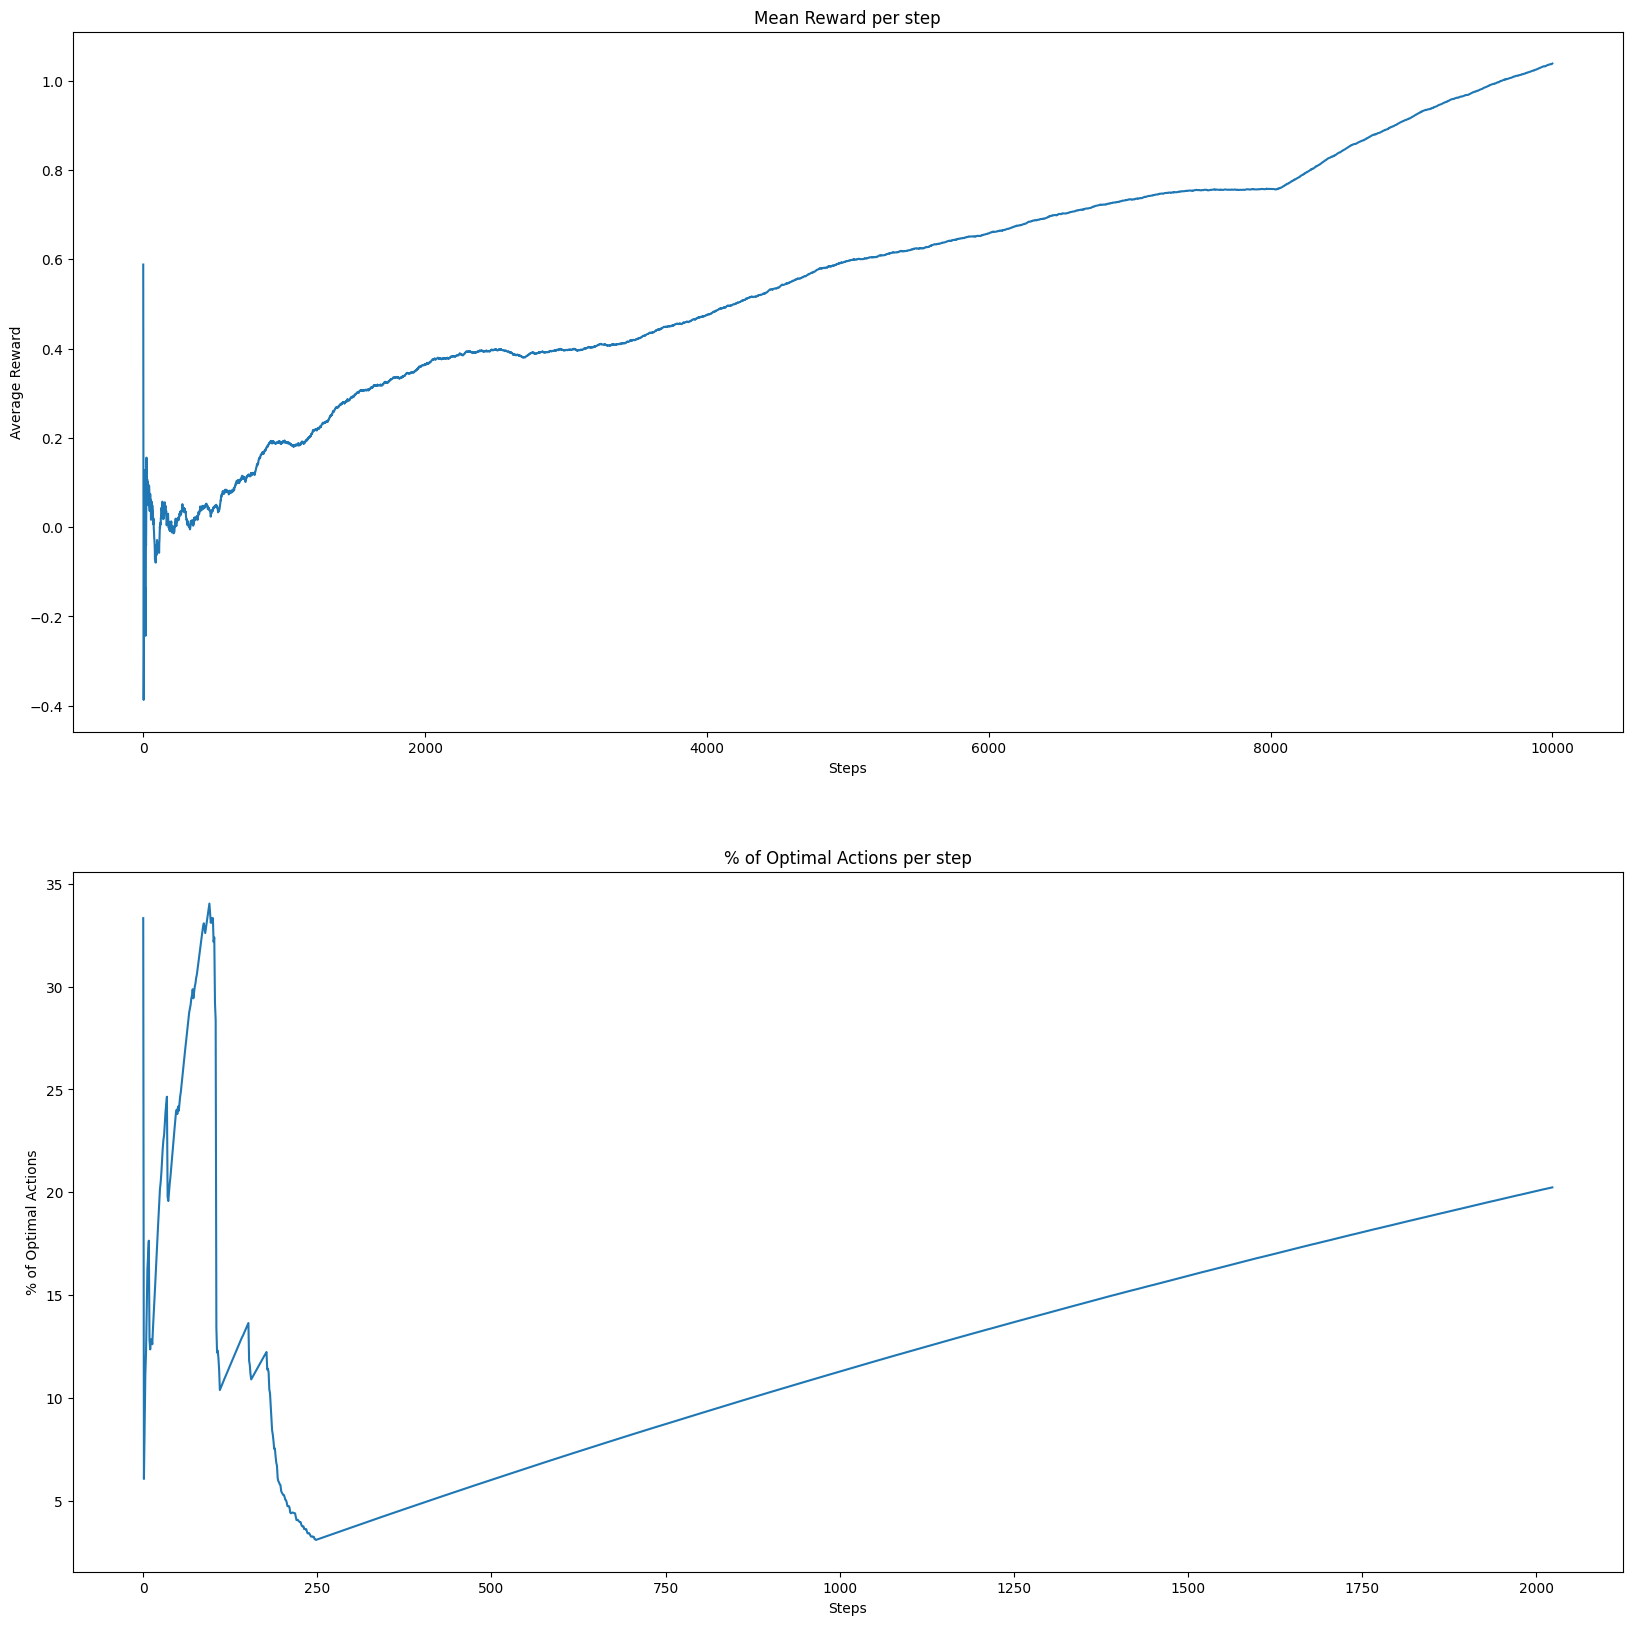

In [53]:
env.reset()
done = False
while not env.done:
    action = agent.choose_action()
    reward, done = env.step(action)
    agent.update_action(action, reward)

env.plot_results()

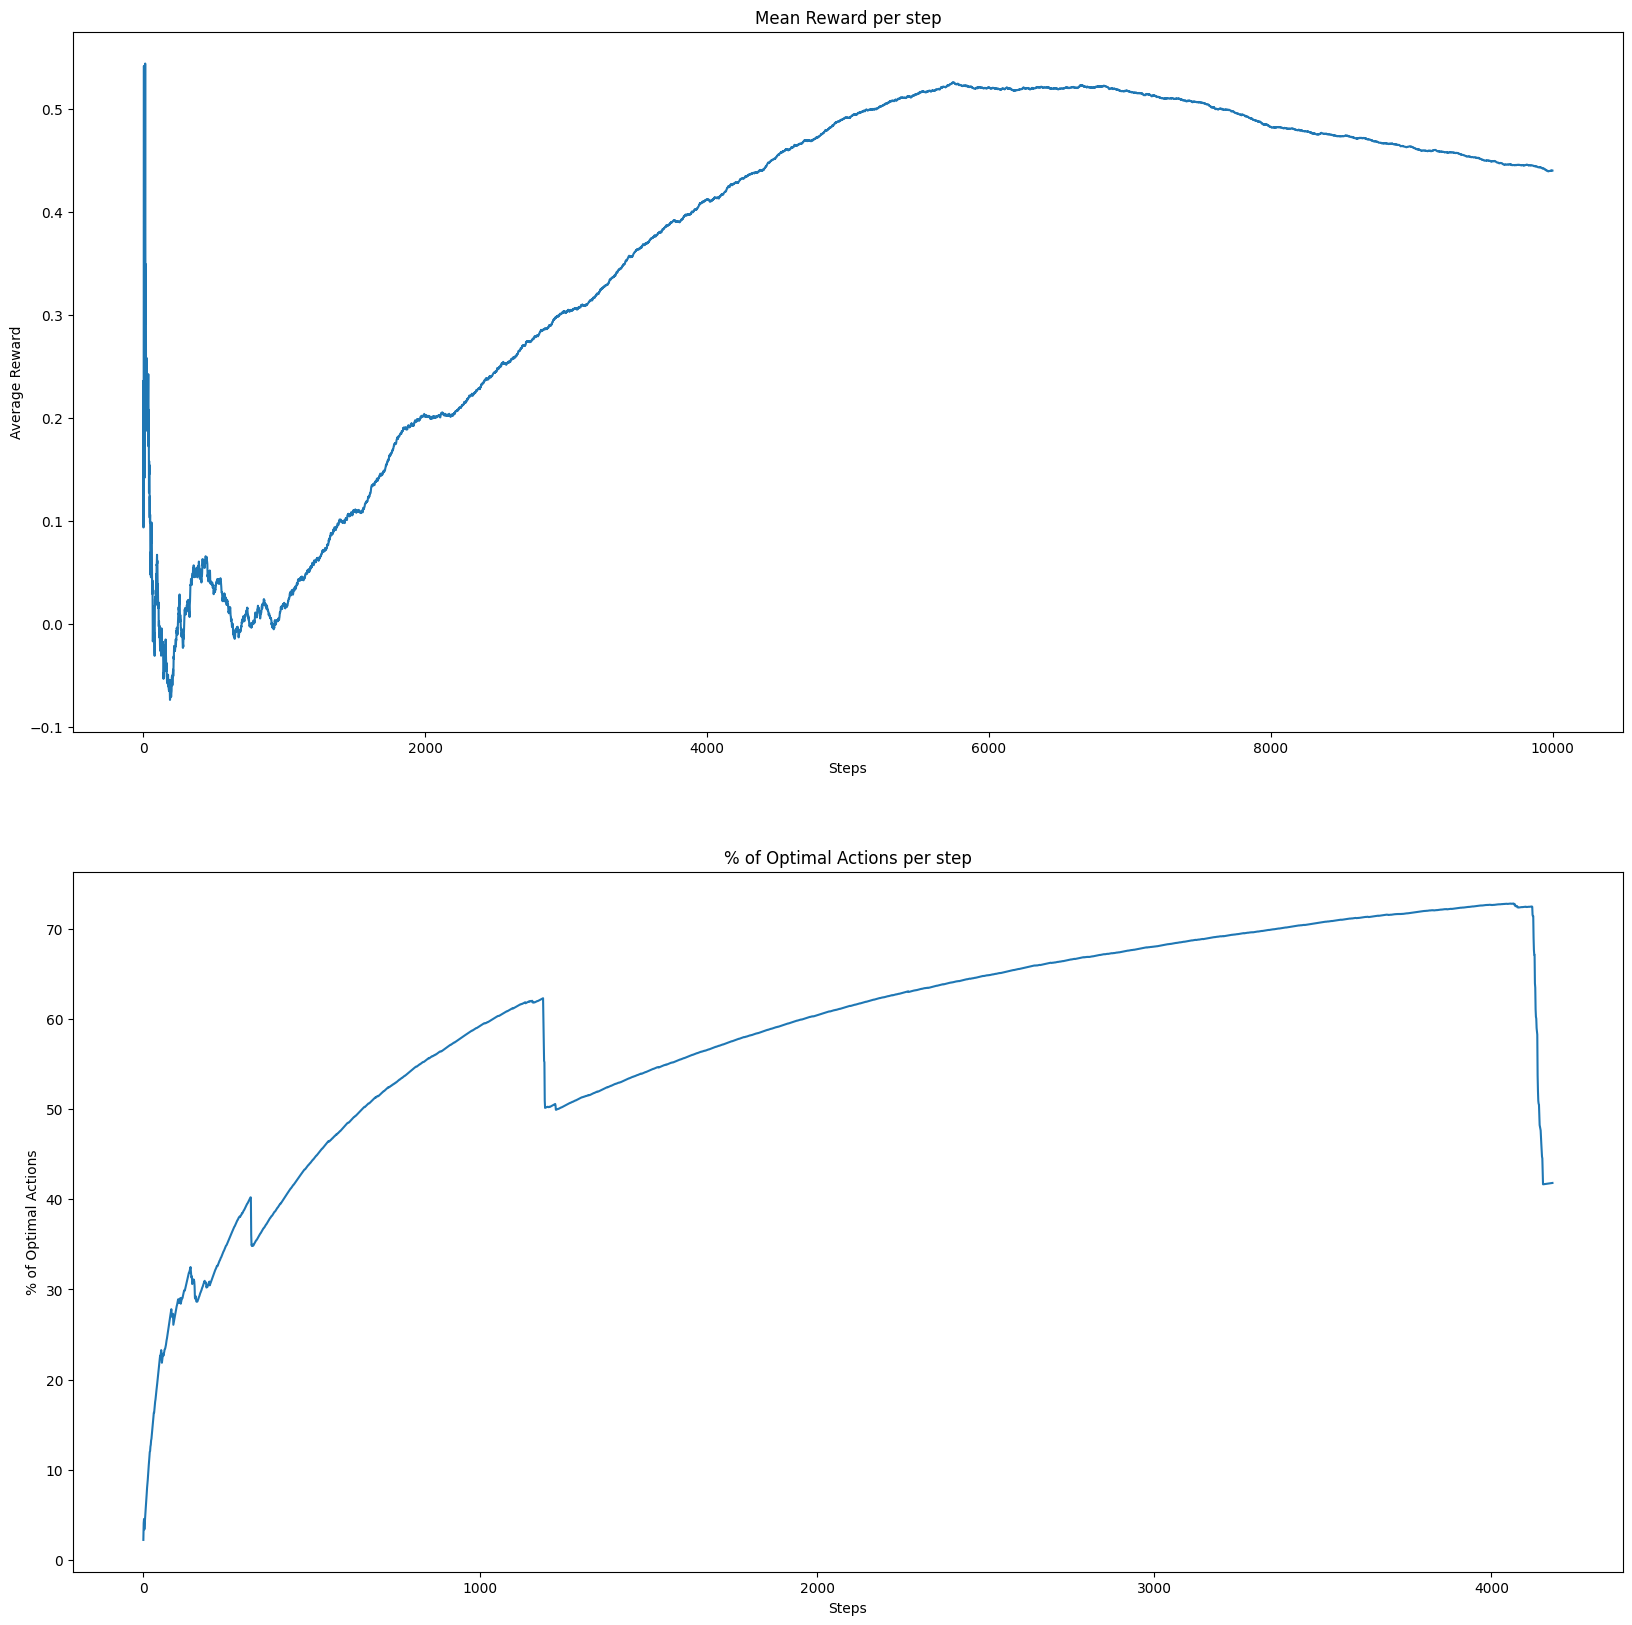

In [54]:
agent = Agent(n_bandits, exponential=True)
env.reset()
done = False
while not env.done:
    action = agent.choose_action()
    reward, done = env.step(action)
    agent.update_action(action, reward)

env.plot_results()